<span color = red> ## Preprocessing
##Time frame 12 corrupted, so we will skip it. Last frame also discarded because it's size is different from the rest </span>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import scipy.interpolate
from scipy.ndimage import gaussian_filter
import tifffile
import seaborn as sns

from IPython.display import HTML
import matplotlib.animation as animation
from tqdm.notebook import tqdm, trange
from scipy.optimize import curve_fit
#import gaussian
from skimage.filters import gaussian
from scipy.interpolate import RectBivariateSpline
from PIL import Image
import itertools
from preprocessing import preprocessingV2 as pre



## PATHS and CONSTANTS



In [4]:
PROJECT_PATH = 'C:/Users/amityu/DataspellProjects/gel_sheets/'
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
#movie ='130721_CCA60_RAW'
#movie ='280523 AM100 568'
#movie = 'control_2_230523'
movie = 'cca120_am200'
ADD_PATH = os.path.join(PROJECT_PATH, "add_data/", movie + "/")


MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'

## <span color=red >Load Images

</span>


In [3]:
#get list of files in directory
import os
filelist = os.listdir(MOVIE_PATH + 'tiff/C1/')
file_list_numbered = []
for i in range(len(filelist)):
    #split file by '_'
    t = int(filelist[i].split('_')[0][1:])
    file_list_numbered.append((t,filelist[i]))
    #sort by time
file_list_numbered.sort(key = lambda x: x[0])
for t in range(len(file_list_numbered)):
    print(file_list_numbered[t][0],file_list_numbered[t][1])




1 T1_Z101_C1.tif
2 T2_Z101_C1.tif
3 T3_Z101_C1.tif
4 T4_Z101_C1.tif
5 T5_Z101_C1.tif
6 T6_Z101_C1.tif
7 T7_Z101_C1.tif
8 T8_Z101_C1.tif
9 T9_Z101_C1.tif
10 T10_Z101_C1.tif
11 T11_Z101_C1.tif
13 T13_Z101_C1.tif
14 T14_Z101_C1.tif
15 T15_Z101_C1.tif
16 T16_Z101_C1.tif
17 T17_Z101_C1.tif
18 T18_Z101_C1.tif
19 T19_Z101_C1.tif
20 T20_Z101_C1.tif
21 T21_Z281_C1.tif
22 T22_Z208_C1.tif
23 T23_Z208_C1.tif
24 T24_Z208_C1.tif
25 T25_Z281_C1.tif
26 T26_Z281_C1.tif
27 T27_Z281_C1.tif
28 T28_Z281_C1.tif
29 T29_Z281_C1.tif
30 T30_Z281_C1.tif
31 T31_Z281_C1.tif
32 T32_Z281_C1.tif
33 T33_Z281_C1.tif
34 T34_Z281_C1.tif
35 T35_Z281_C1.tif
36 T36_Z281_C1.tif
37 T37_Z281_C1.tif
38 T38_Z281_C1.tif
39 T39_Z137_C1.tif
40 T40_Z137_C1.tif
41 T41_Z137_C1.tif
42 T42_Z137_C1.tif
43 T43_Z137_C1.tif
44 T44_Z137_C1.tif
45 T45_Z137_C1.tif
46 T46_Z137_C1.tif
47 T47_Z137_C1.tif
48 T48_Z137_C1.tif
49 T49_Z137_C1.tif


In [4]:
#load images
gel_list = []
for i in range(len(file_list_numbered)):
    gel_list.append(tifffile.imread(MOVIE_PATH + 'tiff/C1/' + file_list_numbered[i][1]).astype(np.float32))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [5]:
# get the max z since images where taken with different
max_z = 0
for t, image in enumerate(gel_list):
    print(t,image.shape)
    z = image.shape[0]
    if z > max_z:
        max_z = z
print(max_z)


0 (101, 512, 512)
1 (101, 512, 512)
2 (101, 512, 512)
3 (101, 512, 512)
4 (101, 512, 512)
5 (101, 512, 512)
6 (101, 512, 512)
7 (101, 512, 512)
8 (101, 512, 512)
9 (101, 512, 512)
10 (101, 512, 512)
11 (101, 512, 512)
12 (101, 512, 512)
13 (101, 512, 512)
14 (101, 512, 512)
15 (101, 512, 512)
16 (101, 512, 512)
17 (101, 512, 512)
18 (101, 512, 512)
19 (281, 512, 512)
20 (201, 512, 512)
21 (201, 512, 512)
22 (201, 512, 512)
23 (281, 512, 512)
24 (281, 512, 512)
25 (281, 512, 512)
26 (281, 512, 512)
27 (281, 512, 512)
28 (281, 512, 512)
29 (281, 512, 512)
30 (281, 512, 512)
31 (281, 512, 512)
32 (281, 512, 512)
33 (281, 512, 512)
34 (281, 512, 512)
35 (281, 512, 512)
36 (281, 512, 512)
37 (137, 512, 512)
38 (137, 512, 512)
39 (137, 512, 512)
40 (137, 512, 512)
41 (137, 512, 512)
42 (137, 512, 512)
43 (137, 512, 512)
44 (137, 512, 512)
45 (137, 512, 512)
46 (137, 512, 512)
47 (137, 512, 512)
281


In [6]:
#set blank areas to nan
gel = np.zeros((len(gel_list), max_z,*gel_list[0].shape[1:]), dtype=np.float32)
gel[gel ==0] = np.nan
for t in range(len(gel)):
    gel[t,:gel_list[t].shape[0],:,:] = gel_list[t]

In [7]:
np.save(MOVIE_PATH + 'np/gel.npy',gel)

In [9]:
del gel

In [10]:
gel = np.load(MOVIE_PATH + 'np/gel.npy', mmap_mode='r')

## <span color=red > Load Channel 2 images

In [47]:
#get list of files in directory
import os
filelist = os.listdir(MOVIE_PATH + 'tiff\C2')
file_list_numbered = []
for i in range(len(filelist)):
    #split file by '_'
    t = int(filelist[i].split('_')[-2][1:])
    file_list_numbered.append((t,filelist[i]))
    #sort by time
file_list_numbered.sort(key = lambda x: x[0])
for t in range(len(file_list_numbered)):
    print(file_list_numbered[t][0],file_list_numbered[t][1])




1 T1_C2.tif
2 T2_C2.tif
3 T3_C2.tif
4 T4_C2.tif
5 T5_C2.tif
6 T6_C2.tif
7 T7_C2.tif
8 T8_C2.tif
9 T9_C2.tif
10 T10_C2.tif
11 T11_C2.tif
13 T13_C2.tif
14 T14_C2.tif
15 T15_C2.tif
16 T16_C2.tif
17 T17_C2.tif
18 T18_C2.tif
19 T19_C2.tif
20 T20_C2.tif
21 T21_C2.tif
22 T22_C2.tif
23 T23_C2.tif
24 T24_C2.tif
25 T25_C2.tif
26 T26_C2.tif
27 T27_C2.tif
28 T28_C2.tif
29 T29_C2.tif
30 T30_C2.tif
31 T31_C2.tif
32 T32_C2.tif
33 T33_C2.tif
34 T34_C2.tif
35 T35_C2.tif
36 T36_C2.tif
37 T37_C2.tif
38 T38_C2.tif
39 T39_C2.tif
40 T40_C2.tif
41 T41_C2.tif
42 T42_C2.tif
43 T43_C2.tif
44 T44_C2.tif
45 T45_C2.tif
46 T46_C2.tif
47 T47_C2.tif
48 T48_C2.tif
49 T49_C2.tif


In [48]:
#load images
motors_list = []
for i in range(len(file_list_numbered)):
    motors_list.append(tifffile.imread(MOVIE_PATH + 'tiff/C2/' + file_list_numbered[i][1]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [49]:
# get the max z since images where taken with different
max_z = 0
for t, image in enumerate(motors_list):
    print(t,image.shape)
    z = image.shape[0]
    if z > max_z:
        max_z = z
print(max_z)


0 (101, 512, 512)
1 (101, 512, 512)
2 (101, 512, 512)
3 (101, 512, 512)
4 (101, 512, 512)
5 (101, 512, 512)
6 (101, 512, 512)
7 (101, 512, 512)
8 (101, 512, 512)
9 (101, 512, 512)
10 (101, 512, 512)
11 (101, 512, 512)
12 (101, 512, 512)
13 (101, 512, 512)
14 (101, 512, 512)
15 (101, 512, 512)
16 (101, 512, 512)
17 (101, 512, 512)
18 (101, 512, 512)
19 (81, 512, 512)
20 (281, 512, 512)
21 (201, 512, 512)
22 (201, 512, 512)
23 (201, 512, 512)
24 (281, 512, 512)
25 (281, 512, 512)
26 (281, 512, 512)
27 (281, 512, 512)
28 (281, 512, 512)
29 (281, 512, 512)
30 (281, 512, 512)
31 (281, 512, 512)
32 (281, 512, 512)
33 (281, 512, 512)
34 (281, 512, 512)
35 (281, 512, 512)
36 (281, 512, 512)
37 (281, 512, 512)
38 (137, 512, 512)
39 (137, 512, 512)
40 (137, 512, 512)
41 (137, 512, 512)
42 (137, 512, 512)
43 (137, 512, 512)
44 (137, 512, 512)
45 (137, 512, 512)
46 (137, 512, 512)
47 (137, 512, 512)
281


In [50]:
#set blank areas to nan
motors = np.zeros((len(motors_list), max_z,*motors_list[0].shape[1:]))
motors[motors ==0] = np.nan
for t in range(len(motors)):
    motors[t,:motors_list[t].shape[0],:,:] = motors_list[t]

In [51]:
np.save(MOVIE_PATH + 'np/membrane.npy',motors)

In [ ]:
motors = np.load(MOVIE_PATH + 'np/motors.npy')
motors_transformed = np.zeros(motors.shape)
import ants
for t in range(len(gel)):
    image = ants.from_numpy(np.transpose(motors[t], (2,1,0)))
    new_image = ants.apply_transforms(fixed=image, moving=image, transformlist=PROJECT_PATH + 'add_data/%s/transform/transform%d.mat'%(movie,t+1), defaultvalue =0)
    motors_transformed[t] = np.transpose(new_image.numpy(), (2,1,0))

In [ ]:
plt.hist(motors_transformed[~np.isnan(motors_transformed)])
plt.title('Motors intensity histogram')
plt.show()


In [ ]:
np.save(MOVIE_PATH + 'np/membrane_transformed.npy',motors_transformed)

## <span color=red >LOAD RAW GEL HERE


### applyting calculated transform to gel


## <span color = red> transform gel

In [12]:
z_df = pd.read_csv(MOVIE_PATH + 'np/stabilize_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/amityu/Gel_Sheet_Data/cca120_am200/np/stabilize_df.csv'

In [42]:
import importlib
importlib.reload(pre)

<module 'preprocessing.preprocessingV2' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\preprocessing\\preprocessingV2.py'>

In [52]:
    #import gaussian filter
from scipy.ndimage import gaussian_filter
gel = np.load(MOVIE_PATH + 'np/membrane.npy', mmap_mode='r')
#for t in range(len(gel)):
#    gel[t] = gaussian_filter(gel[t],2)
img = pre.stabilize(gel[:,:80,:,:], movie_path=MOVIE_PATH ,transform_path =PROJECT_PATH + 'add_data/%s/transform/'%movie, mask_coordinates = (15,35,0,512,0,512),  moving_mask_coordinates =(15,35, 0,512,0,512))


2023-11-23 18:59:48


100%|██████████| 48/48 [04:58<00:00,  6.22s/it]


In [44]:
#import gaussian filter
from scipy.ndimage import gaussian_filter
gel = np.load(MOVIE_PATH + 'np/gel.npy', mmap_mode='r')
#for t in range(len(gel)):
#    gel[t] = gaussian_filter(gel[t],2)
img = pre.step_stabilize(gel[:,:80,:,:], movie_path=MOVIE_PATH ,transform_path =PROJECT_PATH + 'add_data/%s/transform/'%movie, mask_coordinates = (12,30,0,512,0,512),  moving_mask_coordinates =(8,35, 0,512,0,512))


2023-11-23 15:01:01


48it [04:47,  5.98s/it]


In [46]:
np.save(MOVIE_PATH + 'np/gel_transformed.npy',gel_transformed)

In [53]:
gel = np.load(MOVIE_PATH + 'np/gel.npy', mmap_mode='r')
gel_transformed = np.zeros(gel.shape, dtype = np.float32)
import ants
for t in trange(len(gel)):
    numpy_image = np.array(np.transpose(gel[t], (2,1,0)))
    image = ants.from_numpy(numpy_image)
    new_image = ants.apply_transforms(fixed=image, moving=image, transformlist=PROJECT_PATH + 'add_data/%s/transform/transform%d.mat'%(movie,t+1), defaultvalue =0)
    gel_transformed[t] = np.transpose(new_image.numpy(), (2,1,0))

  0%|          | 0/48 [00:00<?, ?it/s]

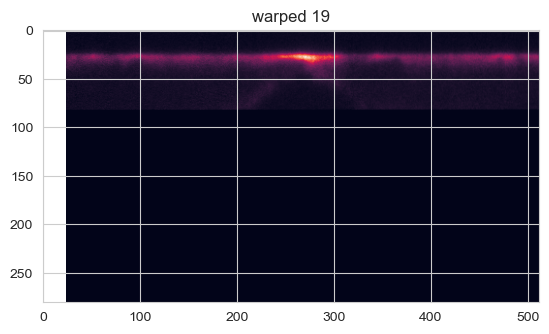

In [24]:
plt.imshow(img[:,:,250])
plt.title('warped 19')
plt.show()

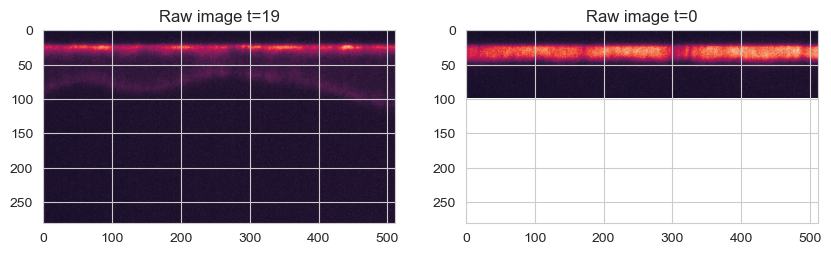

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.imshow(gel[19,:,:,200])
ax1.set_title('Raw image t=19')
ax2.imshow(gel[0,:,:,200])
ax2.set_title('Raw image t=0')
plt.show()

0 sum t = 0


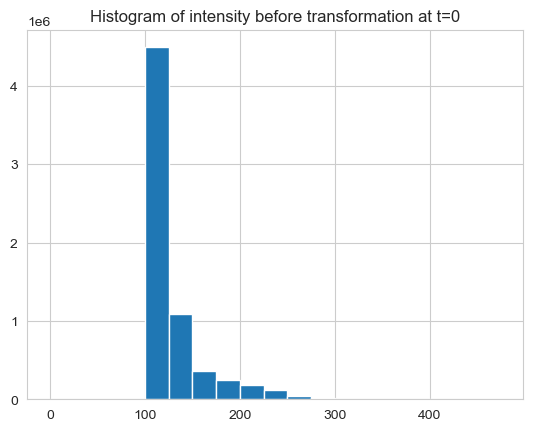

0 sum t = 19


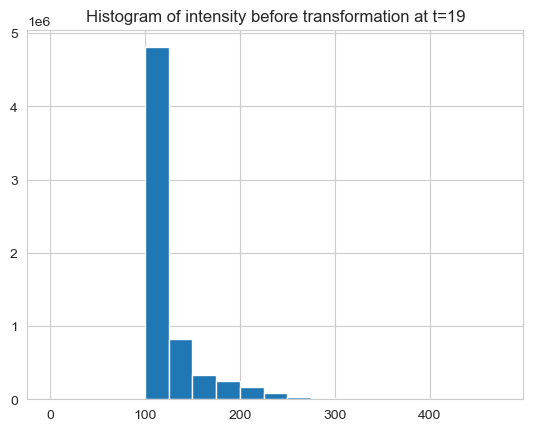

In [50]:
img1 = gel[0,:25,:,:]
print(np.sum(np.isnan(img1)), 'sum t = 0')
img1= img1[~np.isnan(img1)]
plt.hist(img1,  bins = np.arange(0,500,25))
plt.title('Histogram of intensity before transformation at t=0')
plt.show()
img2 = gel[19,:25,:,:]
print(np.sum(np.isnan(img2)), 'sum t = 19')
img2= img2[~np.isnan(img2)]
plt.hist(img2, bins=np.arange(0,500,25))
plt.title('Histogram of intensity before transformation at t=19')
plt.show()


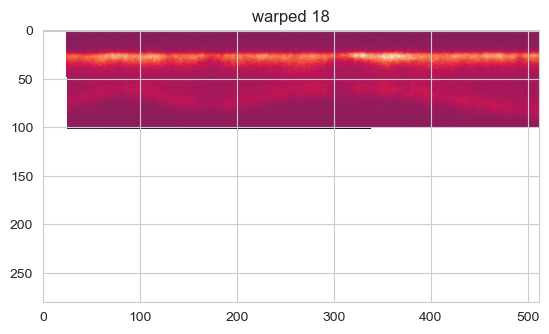

In [32]:
plt.imshow(img[:,:,200])
plt.title('warped 18')
plt.show()

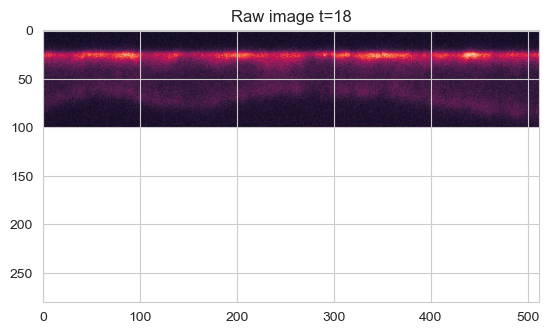

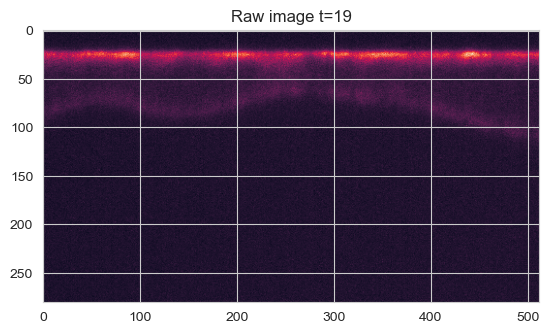

In [30]:
plt.imshow(gel[18,:,:,200])
plt.title('Raw image t=18')
plt.show()
plt.imshow(gel[19,:,:,200])
plt.title('Raw image t=19')
plt.show()


In [11]:
from scipy.io import loadmat
data = loadmat(PROJECT_PATH + 'add_data/%s/transform/transform%d.mat'%(movie,22))

In [21]:
gel = np.load(MOVIE_PATH + 'np/gel.npy', mmap_mode='r')
img = pre.stabilize(gel, movie_path=MOVIE_PATH ,transform_path =PROJECT_PATH + 'add_data/%s/transform/'%movie, mask_coordinates = (0,20,0,512,0,512),  moving_mask_coordinates =(0,10, 0,512,0,512), z_df=None, time_range=range(26,41))

2023-09-29 16:01:58


100%|██████████| 124/124 [03:31<00:00,  1.70s/it]


In [28]:
gel_transofrmed = np.zeros_like(gel)
for t in trange(len(gel)):
    gel_transofrmed[t] = tifffile.imread(MOVIE_PATH + '/tmp/warped_image' + str(t+1) + '.tif')

  0%|          | 0/48 [00:00<?, ?it/s]

In [54]:
np.save(MOVIE_PATH + 'np/gel_transformed.npy',gel_transofrmed)


In [23]:
tifffile.imwrite(MOVIE_PATH+'np/slice_41.tiff', gel[:,:,:,200].astype(np.float32))

In [ ]:
plt.imshow(gel_transformed[10,8,:,:])
plt.show()

In [12]:

gel_transformed[gel_transformed == 0] = np.nan


In [13]:
tifffile.imsave(MOVIE_PATH + 'np/slice.tif', gel_transformed[:,:,:,200].astype(np.float32))

In [ ]:
bins = np.linspace(0, 300, 50)
plt.hist(gel[~np.isnan(gel)], bins = bins)
plt.title('Histogram of intensity before transformation')
plt.show()

plt.hist(gel_transformed[~np.isnan(gel_transformed)], bins = bins)
plt.title('Histogram of intensity after transformation')

plt.show()


In [5]:
np.save(MOVIE_PATH + 'np/gel_transformed.npy',gel_transformed)

In [ ]:
gel_transformed = np.load(MOVIE_PATH + 'np/gel_transformed.npy')

gel_transformed[np.isnan(gel_transformed)] = np.nanmean(gel_transformed[25,70:80,:,:])

## <span color=red> Illumination filter

In [ ]:
fig, axes = plt.subplots(15,1, figsize = (10,30))
for i,t in enumerate(range(0,len(gel_transformed),5)):
    slice = gel_transformed[t,0:5,:,:]
    slice[np.isnan(slice)] = np.nanmean(slice)
    illumination_filter = np.nanmean(gaussian_filter(slice,sigma=25),axis = 0)
    axes[i].imshow(illumination_filter)
    axes[i].set_title('Illumination filter time %d'%t)
plt.show()

In [ ]:
gel_corrected = np.zeros(gel.shape, dtype=np.float32)
filter_sigma = 25

for t in range(len(gel_transformed)):
    slice = gel_transformed[t,0:5,:,:]
    slice[np.isnan(slice)] = np.nanmean(slice)
    illumination_filter = np.nanmean(gaussian_filter(slice,sigma=25),axis = 0)
    gel_corrected[t] = gel_transformed[t]/illumination_filter

In [ ]:
del gel_transformed

In [ ]:
bins = np.linspace(0, 5, 50)
plt.hist(gel_corrected[~np.isnan(gel_corrected)], bins = bins)
plt.title('Histogram of intensity with filter')
plt.show()


In [ ]:
np.save(MOVIE_PATH + 'np/gel_norm.npy',gel_corrected)

In [ ]:
gel_corrected = np.load(MOVIE_PATH + 'np/gel_norm.npy')

<span color = yellow> Background bellow membrane measuring


monomer_data_df = pd.read_csv(MOVIE_PATH + 'np/monomer_rect.csv')
mean_corrected = []
std_corrected = []
for idx,row in monomer_data_df.iterrows():
    t = idx
    iz = int(row['Z'])
    iy = int(row['Y'])
    ix = int(row['X'])
    r_size = int(row['r_size'])
    gap_from_surface = int(row['gap_from_surface'])
    y_gap = int(row['y_gap'])
    i_data = gel_corrected[t, iz+gap_from_surface:iz+r_size, iy:iy+y_gap, ix:ix+r_size]
    i_data = i_data[i_data>0]
    mean = np.nanmean(i_data)
    std = np.nanstd(i_data)
    mean_corrected.append(mean)
    std_corrected.append(std)

monomer_data_df['mean'] = mean_corrected
monomer_data_df['std'] = std_corrected
monomer_data_df.to_csv(MOVIE_PATH + 'np/monomer_rect.csv')

illumination_fix = True
sigma =25
z = 0
delta_z =5
bin_number =50
#frame_shape = gel[0,:,:,0].shape
max_intensity = np.nanmax(gel[:,z:z + delta_z, :, :])
min_intensity = np.nanmin(gel[:,z:z + delta_z, :, :])
bins = np.linspace(min_intensity, max_intensity, bin_number + 1)

num_frames = len(gel)
y_max = 0.2

# Update function for each frame
def update_frame(t):

    ax.clear()
    data_corrected = gel_corrected[t,z:z + delta_z, :, :].flatten()
    #data_not_corrected = gel[t,z:z + delta_z, :, :].flatten()

    # Create an array for the interpolated values
    interpolated_x, smoothed_y, density,  mean, std, amp = plot_data(data_corrected, bins=bins)
    ax.bar(bins[:-1], density,width=np.diff(bins), align='edge', label='histogram corrected', alpha=0.7, color='red')
    ax.plot(interpolated_x, smoothed_y, label='Gaussian fit', color='red', linewidth=2)
    ax.set_ylim (0,y_max)
    illumination_str = 'illumination_fix' if illumination_fix else 'no_illumination_fix'
    ax.set_title('BG below membrane frequency \n movie %s time %d \n z=%d-%d' % (movie,t, z, z+delta_z))

    #interpolated_x, smoothed_y, density,  mean, std , amp= plot_data(data_not_corrected, bins=bins)
    #ax.bar(bins[:-1], density,width=np.diff(bins), align='edge', label='histogram not corrected', alpha=0.5, color = 'blue')
    #ax.plot(interpolated_x, smoothed_y, label='Gaussian fit', color='blue', linewidth=2)

    ax.legend()
    return plot,

# Create a figure and axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Create an empty plot
plot = ax.bar(bins, np.ones(len(bins)))

ax.set_ylim(0,0.1)


# Create the animation
myanimation = animation.FuncAnimation(fig, update_frame, range(num_frames), interval=1000)
writer = animation.FFMpegWriter(fps=1)

myanimation.save(GRAPH_PATH + 'bg_bellow_membrane\%s_bg_hist_ill%d.mp4'%(movie, illumination_fix), writer=writer)

# Display the animation
HTML(myanimation.to_jshtml())
plt.close()

In [ ]:
bins

In [ ]:
t = 2
imseq = gel[t]


np.array(imseq[10]).shape

In [ ]:
im_stack = imseq

In [ ]:
plt.figure()
for i  in range(0,512,50):
    plt.plot(im_stack[:,256,i])

plt.title(' Raw data '  + movie + " t = %d intensity profile in z "%t)
plt.show()

###    Illumination filter validation

### Photobeaching? I plot the mean of intensity below the membrane over time
## Photobleaching seems low, but it could be intersting to see how much the membrange florecense is bleaching, so we can get better estimation. THe membrane is  \n
## using different flourcence material in  a different channel


mean_list = []
corrected_mean_list = []
min_z = 0
max_z = 8
sigma =25
for t in range(len(gel)):
    bg_below_plate = gel[t,min_z:max_z,:,:]
    illumination_filter = np.mean(gaussian_filter(bg_below_plate,sigma=sigma),axis = 0)
    corrected_mean_list.append(np.mean(gel[t,min_z:max_z,:,:]/illumination_filter))
    mean_list.append(np.mean(gel[t,min_z:max_z,:,:]))#/np.mean(illumination_filter))

fig,axes = plt.subplots(1,2  , figsize = (15,5))


plt.suptitle('%s \n z from %d to %d'%(movie, min_z, max_z))

axes[0].plot(mean_list, label = 'mean_bg', color = 'red')
axes[0].title.set_text('Intensity mean below membrane \n on raw data')
axes[1].plot(corrected_mean_list, label = 'mean_bg_corrected')
axes[1].title.set_text(' \nMean below membrane \n corrected with Gaussian filter with sigma = %d \n filter taken at each time frame'%sigma)
#plt.ylim(0.9968,0.9970)

axes[0].set_xlabel('t (min)')
axes[1].set_xlabel('t (min)')
axes[0].set_ylabel('Intensity Mean')
axes[1].set_ylabel('Intensity Mean')
axes[1].set_ylim(min(corrected_mean_list),min(corrected_mean_list)*max(mean_list)/min(mean_list))
plt.savefig(GRAPH_PATH + 'illumination_filter\%s_mean_bg.png'%movie)
plt.show()


###    Illumination filter animation


In [ ]:

#write animation with illumination filter for each frame
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'jshtml'
gel = np.load(MOVIE_PATH + 'np/gel.npy')
frames = np.zeros((gel.shape[0],gel.shape[2],gel.shape[3]))
for t in range(len(gel)):
    frames[t] = np.mean(gaussian_filter(gel[t,min_z:max_z,:,:], sigma),axis = 0)
num_frames = len(frames)
frame_shape = frames.shape[1:]

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)
# Create an empty plot
plot = ax.imshow(frames[0], cmap='jet', vmin=105, vmax = 115,animated=True)
plt.xlabel('X (Pixels)')
plt.ylabel('Y (Pixels)')


cbar = plt.colorbar(plot)
#set max color bar is 200

# Update function for each frame
def update_frame(t):
    ax.imshow(frames[t], cmap='jet',vmin=105,vmax=115)

    #ax.set_title('movie %s Frame: %d \n Intesity projection \n i =  %d -  %d' % (movie,t,i,i+i_gap))
    ax.set_title('%s \n Illumination filter time %d' % (movie,t    ))
    # Highlight the specified coordinates
    #plot.axes.plot(x_coord, y_coord, 'ro')

    return plot,

# Create the animation
myanimation = animation.FuncAnimation(fig, update_frame, frames=range(num_frames), interval=1000, blit=True)
writer = animation.FFMpegWriter(fps=1)

myanimation.save(GRAPH_PATH + 'preprocessing/' + movie + 'illumination filter z=%d- %d.mp4'%(min_z, max_z), writer=writer)
#myanimation.save(GRAPH_PATH + 'preprocessing/' + movie + 'j=256.mp4', writer=writer)


# Display the animation
plt.show()
HTML(myanimation.to_jshtml())

In [ ]:
mean_illumination = np.mean(frames, axis = (1,2))
plt.plot(mean_illumination)
plt.title('Mean illumination filter over time')
plt.xlabel('Time')
plt.ylabel('Mean illumination filter')
plt.show()


### geting monomoer signal,
## finding monomer area
## Line scan of monomer area animation

In [ ]:
from IPython.display import HTML
plt.rcParams['animation.html'] = 'jshtml'
import matplotlib.animation as animation

mip_width = 500
frame_shape = gel[0,:,:,0].shape
max_intensity = np.nanmax(gel)
num_frames = len(gel)

#for j in range(0,gel.shape[3],mip_width):
for j in [250]:
    # Create a figure and axis
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    #ax.set_position([0.1, 0.1, 0.8, 0.8])  # Sets the size of the axes within the figure

    # Create an empty plot
    plot, = ax.plot(np.zeros(10))
    ax.set_ylim(0,max_intensity)

    # Update function for each frame
    def update_frame(t):

        ax.clear()
        for i in range(0,500,500):
        #for i in range(0,gel.shape[2],mip_width):

            line = np.max(gel[t,:,i:i+mip_width,j], axis=1) #get line of intensity
            #replace nun with zero in image
            line[np.isnan(line)] = 0
            ax.plot(line, label = 'i = %d - %d'%(i, i+mip_width))
            ax.set_ylim (0,max_intensity)
            plt.xlabel('Z')
            plt.ylabel('Intensity')

        ax.set_title('movie %s Frame: %d j=%d, mip_width=%d' % (movie,t,j,mip_width))
        ax.legend()
        return plot,

    # Create the animation
    myanimation = animation.FuncAnimation(fig, update_frame, range(num_frames), interval=1000, blit=True)
    writer = animation.FFMpegWriter(fps=1)

    myanimation.save(GRAPH_PATH + 'preprocessing/' + movie + 'linescan_j=%d_mip_width=%d.mp4'%(j,mip_width), writer=writer)

# Display the animation
#plt.show()
#HTML(myanimation.to_jshtml())
plt.close()

## <span color = red>RAW MIP  animation


import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'jshtml'
gel = np.load(MOVIE_PATH + 'np/gel.npy')
gel_corrected = np.zeros(gel.shape)
min_z = 0
max_z = 8
for t in range(len(gel)):
    gel_corrected[t] = np.mean(gaussian_filter(gel[t,min_z:max_z,:,:], sigma),axis = 0)

gel = gel_corrected

i = 0
for i_gap in [1,20,50,100,250,500]:
    frames = np.max(gel[:,:, i:i+i_gap, :], axis = 2)
    frames[np.isnan(frames)] = 0
    num_frames = len(frames)
    frame_shape = frames.shape[1:]

    # Create a figure and axis
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Create an empty plot
    plot = ax.imshow(frames[0], cmap='jet', vmin=0, vmax = 200,animated=True)
    plt.xlabel('X (Pixels)')
    plt.ylabel('Z (Pixels)')

    cbar = plt.colorbar(plot)
    #set max color bar is 200

    # Update function for each frame
    def update_frame(t):
        ax.imshow(frames[t], cmap='jet',vmin=0,vmax=200)

        #ax.set_title('movie %s Frame: %d \n Intesity projection \n i =  %d -  %d' % (movie,t,i,i+i_gap))
        ax.set_title('%s raw y=%d-%d'%(movie, i, i+i_gap))
        # Highlight the specified coordinates
        #plot.axes.plot(x_coord, y_coord, 'ro')

        return plot,

    # Create the animation
    myanimation = animation.FuncAnimation(fig, update_frame, frames=range(num_frames), interval=100, blit=True)
    writer = animation.FFMpegWriter(fps=1)

    myanimation.save(GRAPH_PATH + 'preprocessing/' + movie + 'mip_i_%d-%d.mp4'%(i,i+i_gap), writer=writer)
    #myanimation.save(GRAPH_PATH + 'preprocessing/' + movie + 'j=256.mp4', writer=writer)


# Display the animation
plt.show()
HTML(myanimation.to_jshtml())

## <span color = red>Gel monomer free area animation <span>


# now we treat gel as the final version after illumination filter and transformation


In [ ]:
from scipy.optimize import curve_fit

# Define the Gaussian function
def fit_gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


In [ ]:
def plot_data(data, bins, bins_number=50):
    # bins = np.linspace(min_intensity, max_intensity, bins_number+1)   # Define the bins
    hist, _ = np.histogram(data[~np.isnan(data)], bins=bins, density=True)
    mean = np.nanmean(data)
    std = np.nanstd(data)

    # Calculate the bin widths
    bin_widths = bins[1:] - bins[:-1]
    bin_gap_mid = (bins[1] - bins[0])/ 2
    # Calculate the density function
    density = hist / np.sum(hist * bin_widths)
    #original_array = density

    x_data = np.linspace(bins[0] + bin_gap_mid , bins[-1] - bin_gap_mid, len(density))
    y_data = density

    # Fit the Gaussian function to the data
    initial_guess = [mean, std, 1]  # Initial guess for the parameters: [mu, sigma, amplitude]
    optimized_params, _ = curve_fit(fit_gaussian, x_data, y_data, p0=initial_guess)

    # Extract the optimized parameter values
    mu_opt, sigma_opt, amplitude_opt = optimized_params

    # Generate the fitted curve using the optimized parameters
    y_fitted = fit_gaussian(x_data, mu_opt, sigma_opt, amplitude_opt)
    new_indices = np.linspace(0, len(y_fitted) - 1, 50 * len(y_fitted))

    # Perform interpolation
    interpolated_y   = np.interp(new_indices, range(len(y_fitted)), y_fitted)
    interpolated_x   = np.interp(new_indices, range(len(y_fitted)), x_data)
    smoothed_y = gaussian_filter(interpolated_y, sigma=15)
    return interpolated_x, smoothed_y, density,  mu_opt, sigma_opt, amplitude_opt

In [ ]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy')

In [ ]:
illumination_fix = True
monomer_data_df = pd.read_csv(ADD_PATH + 'monomer_rect.csv')
sigma = 25
z = 0
delta_z = 5
bin_number = 50
frame_shape = gel[0,:,:,0].shape
num_frames = len(gel)
y_max = 15
#gel_corrected = np.zeros(gel.shape)
#gel_corrected[np.isnan(gel_corrected)] = 0
#for t in range(len(gel)):
#    gel_corrected[t] = gel[t] / illumination_filter
#gel_corrected[gel_corrected < 0.5] = np.nan
max_intensity = np.nanmax(gel)
max_intensity =1.5
min_intensity = np.nanmin(gel)


bin_number = 50
bins = np.linspace(min_intensity, max_intensity, bin_number + 1)
I_mean_list = []
I_std_list = []

# Update function for each frame
def update_frame(t):
    ax.clear()

    iz = monomer_data_df.at[t, 'Z']
    iy =monomer_data_df.at[t, 'Y']
    ix = monomer_data_df.at[t, 'X']
    r_size = monomer_data_df.at[t, 'r_size']
    gap_from_surface =monomer_data_df.at[t, 'gap_from_surface']
    y_gap = monomer_data_df.at[t, 'y_gap']
    data_corrected = gel[t, iz+gap_from_surface:iz+r_size, iy:iy+y_gap, ix:ix+r_size]
    #data_not_corrected = gel_corrected[t, iz+gap_from_surface:iz+r_size, iy:iy+y_gap, :]

    data_corrected = data_corrected[~np.isnan(data_corrected)]
    if data_corrected.size == 0:
        return plot,
    #data_not_corrected = data_not_corrected[~np.isnan(data_not_corrected)]
    #if data_not_corrected.size == 0:
    #    return plot,

    # Create an array for the interpolated values
    try:
        interpolated_x, smoothed_y, density, mean, std, amp = plot_data(data_corrected, bins=bins)

        I_mean_list.append(mean)
        I_std_list.append(std)
        ax.set_xlabel('Intensity', fontsize = 18)
        ax.set_ylabel('Frequency', fontsize = 18)
        ax.set_ylim(0, y_max)
        #ax.set_title('Monomer Histogram\n movie %s time %d \n z=%d-%d, x=%d-%d all y \n ' % (movie, t, row['z_start'], row['z_start'] + row['z_gap'], row['j_start'], row['j_start'] + row['j_gap']))
        ax.set_title('Monomer Histogram\n movie %s time %d' % (movie, t ))

        #interpolated_x, smoothed_y, density, mean, std, amp = plot_data(data_not_corrected, bins=bins)
        #ax.plot(interpolated_x, smoothed_y, color='b', label='Gaussian Fit on all values including debris ')
        ax.plot(interpolated_x, smoothed_y, color='r', label='Gaussian Fit on areas without debris ')
    except:
        print(t, 'error')
        return plot,
    #density[np.isnan(density)] = 0
    ax.bar(bins[:-1], density, width=np.diff(bins), align='edge', label='intensity histogram', alpha=0.5, color='b')
    ax.legend()
    return plot,


# Create a figure and axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
#ax.set_position([0.1, 0.1, 0.8, 0.8])  # Sets the size of the axes within the figure

# Create an empty plot
plot = ax.bar(bins, np.ones(len(bins)))


# Create the animation
myanimation = animation.FuncAnimation(fig, update_frame, range(num_frames), interval=1000)
writer = animation.FFMpegWriter(fps=1)

myanimation.save(GRAPH_PATH + 'detecting_monomer\%s_monomer_hist_red_clean.mp4' % movie, writer=writer)

# Display the animation
HTML(myanimation.to_jshtml())
#plt.close()

In [ ]:
I_mean_list = []
I_std_list = []
z = 0
delta_z = 5
sigma = 25


max_intensity =1.5
min_intensity = np.nanmin(gel)


bin_number = 50
bins = np.linspace(min_intensity, max_intensity, bin_number + 1)


for t in trange(len(gel)):

    iz = monomer_data_df.at[t, 'Z']
    iy =monomer_data_df.at[t, 'Y']
    ix = monomer_data_df.at[t, 'X']
    r_size = monomer_data_df.at[t, 'r_size']
    gap_from_surface =monomer_data_df.at[t, 'gap_from_surface']
    y_gap = monomer_data_df.at[t, 'y_gap']
    data_corrected = gel[t, iz+gap_from_surface:iz+r_size, iy:iy+y_gap, ix:ix+r_size]

    data_corrected = data_corrected[~np.isnan(data_corrected)]
    if data_corrected.size == 0:
        I_mean_list.append(np.nan)
        I_std_list.append(np.nan)
        continue
    interpolated_x, smoothed_y, density, mean, std, amp = plot_data(data_corrected, bins=bins)
    I_mean_list.append(mean)
    I_std_list.append(std)



monomer_data_df['gaussian_mean'] = I_mean_list
monomer_data_df['gaussian_std'] = I_std_list
monomer_data_df.to_csv(MOVIE_PATH + 'np/monomer_rect.csv')

### <span color = red> copy dataframe to add data folder


In [ ]:
monomer_data_df = pd.read_csv(ADD_PATH + 'monomer_rect.csv')

In [ ]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy')

In [ ]:
zero_gel =gel.copy()
zero_gel[np.isnan(zero_gel)] = 0
gel_corrected = zero_gel
from skimage.filters import apply_hysteresis_threshold
from skimage import morphology
from skimage.morphology import ball
from scipy.ndimage import label
monomer_data_df = pd.read_csv(MOVIE_PATH + 'np/monomer_rect.csv')
step_number_list = [512]#[64,128,170,256]
selem_radius_list = [2]#[1]
surface = np.zeros((gel_corrected.shape[0],gel_corrected.shape[2], gel_corrected.shape[3]))
membrane = np.zeros((gel_corrected.shape[0],gel_corrected.shape[2], gel_corrected.shape[3]))
time_range = range(len(surface))
# get the Cartesian product
cartesian_product = itertools.product(step_number_list, selem_radius_list)

# iterate over the Cartesian product
for (step_number, selem_radius) in cartesian_product:
    for t in tqdm(time_range):
        h = np.zeros(gel.shape[2:])
        m = np.zeros(gel.shape[2:])
        '''mask = apply_hysteresis_threshold(gel_corrected[t,:,:,:], monomer_data_df.iloc[t]['gaussian_std']*3.5+ monomer_data_df.iloc[t]['gaussian_mean'], monomer_data_df
        .iloc[t]['gaussian_std']*3.5 + monomer_data_df.iloc[t]['gaussian_mean'])'''
        mask = gel_corrected[t,:,:,:] > monomer_data_df.iloc[t]['gaussian_std']*4.5+ monomer_data_df.iloc[t]['gaussian_mean']
        #mask = gel_corrected[t,:,:,:] > monomer_data_df.iloc[t]['gaussian_std']*4+ 1
        selem =ball(selem_radius)
        selem[2:] = 0

        #selem = np.ones((2,3,3), dtype=bool)
        #selem[:int(selem_detph/2)] = 0

        # Perform binary closing with the specified structuring element to fill holes
        #mask = morphology.binary_closing(mask, selem)
        mask = morphology.binary_dilation(mask, selem)
        cleaned_mask = np.zeros(mask.shape)
        #for z in range(mask.shape[0]):
        #    cleaned_mask[z] = morphology.remove_small_objects(mask[z], min_size=2500    , connectivity=3)
        connected_components, num_components = label(mask)
        component_sizes = np.bincount(connected_components.ravel())

        # Get the label of the largest component (label 0 is reserved for the background)
        largest_label = np.argmax(component_sizes[1:]) + 1

        # Create a binary mask containing only the largest component
        cleaned_mask = connected_components == largest_label
        for i in range(h.shape[0]):
            for j in range(h.shape[1]):
                try:
                    h[i,j] = np.where(cleaned_mask[:,i,j])[0][-1]
                    m[i,j] = np.where(cleaned_mask[:,i,j])[0][0]
                except:
                    print ('error')
                    h[i,j] = np.nan
                    m[i,j] = np.nan

        x = range(h.shape[1])
        y = range(h.shape[0])

        #spline = RectBivariateSpline(y, x, h, kx=2, ky=2, s=0)
        #new_x = np.linspace(0, h.shape[1], step_number)
        #new_y = np.linspace(0, h.shape[0], step_number)
        #h_tag= spline(new_y,new_x)
        #spline = RectBivariateSpline(new_y, new_x, h_tag, kx=2, ky=2, s=0)
        #h = spline(y,x)
        surface[t] = h#gaussian(h, sigma=1)
        membrane[t] = m#gaussian(m, sigma=1)
    np.save(MOVIE_PATH + 'np/height%d_ball_radius%d.npy'%(step_number,selem_radius), surface)
    np.save(MOVIE_PATH + 'np/membrane%d_ball_radius%d.npy'%(step_number,selem_radius),membrane)
    plt.pcolormesh(h)

    plt.colorbar()
    plt.show()


In [ ]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy')
membrane = np.load(MOVIE_PATH + 'np/membrane.npy') + 3
surface = np.load(MOVIE_PATH + 'np/height.npy')
membrane_mask = ~np.isnan(membrane)
surface_mask = ~np.isnan(surface)

membrane[np.isnan(membrane)] = 0
surface[np.isnan(surface)] = 0
membrane = membrane.astype(int)
surface = surface.astype(int)

In [ ]:
masked_gel = gel.copy()
for t in range(gel.shape[0]):
    for x in range(gel.shape[3]):
        for y in range(gel.shape[2]):
            gel[t,:membrane[t,y,x],y,x] = 0
            gel[t,surface[t,y,x]:,y,x] = 0

In [ ]:
np.save(MOVIE_PATH + 'np/masked_gel.npy', masked_gel)

In [ ]:
for t,image in enumerate(masked_gel):
    tifffile.imsave(MOVIE_PATH + 'masked_tiff/masked_gel_%d.tif'%t, image)

In [ ]:
#force reload of module
import importlib
importlib.reload(exploration_exec)

In [ ]:
plt.hist(gel_corrected[21,85:95,380,300:310].flatten(), bins=100)
plt.show()

In [ ]:
from analysis import exploration_exec

step_number_list = [128,170,256,512]
selem_radius_list = [1,2,3]
plot_sigma_list = [5,7,9]
cartesian_product = itertools.product(step_number_list, selem_radius_list, plot_sigma_list)
for (step_number, selem_radius, plot_sigma) in cartesian_product:
    exploration_exec.surface_animation_save(movie, step_number, selem_radius, plot_sigma)


In [ ]:
gel_image = Image.fromarray(gel[t,:, :,x_line]).resize((step_number,160))
plt.pcolormesh(gel_image)
plt.plot(gaussian_filter(h_tag[:, int(step_number*x_line/h.shape[1])],1), 'r')


In [ ]:
np_img = np.array(gel_image)
#plt.plot(np_img[:,105], label='105')
plt.plot(np_img[:,110], label='110')
#plt.plot(np_img[:,115], label='115')
plt.plot(np_img[:,10], label='10')
#plt.plot(np_img[:,30], label='30')
plt.legend()
plt.show()

In [ ]:
t= 20
z =60
fig, (ax1,ax2) = plt.subplots(1,2)
thresh = monomer_data_df.iloc[t]['line_std']*3+ monomer_data_df.iloc[t]['I_mean']
gel_image = gel_corrected[t,z,:,:]
binary = gel_image> thresh
plot = ax1.imshow(binary, cmap = 'gray')
colorbar = fig.colorbar(plot, ax=ax1)

ax1.set_title('binary')
ax2.imshow(gel_image)
ax2.set_title('gel')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, filters

# Load an example image
image = gel_image

# Apply all threshold methods and plot the results
fig, ax = filters.try_all_threshold(image, figsize=(10, 8), verbose=False)

# Customize the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, morphology

# Load a binary image (e.g., after thresholding)
image = binary.copy()

# Perform morphological opening to remove noise
opened_image = morphology.opening(image, morphology.disk(1))

# Perform morphological closing to further refine the image
closed_image = morphology.closing(opened_image, morphology.disk(1))

# Display the original and processed images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(opened_image, cmap='gray')
ax[1].set_title('Opened Image')

ax[2].imshow(closed_image, cmap='gray')
ax[2].set_title('Closed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, morphology
#use otsu to threshold
thresh = filters.threshold_otsu(gel_image)
# Load a binary image (e.g., after thresholding)
image = gel_image > thresh
# Remove small objects (noise) from the binary image
cleaned_image = morphology.remove_small_objects(image, min_size=9, connectivity=3)
cleaned_image_monomer = morphology.remove_small_objects(binary, min_size=9, connectivity=3)


# Display the original and cleaned images
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(cleaned_image, cmap='gray')
ax[1].set_title('Cleaned Image')

ax[2].imshow(cleaned_image_monomer, cmap='gray')
ax[2].set_title('Cleaned Image Monomer')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
